In [1]:
from sklearn.datasets import fetch_openml

mnist = fetch_openml('mnist_784', version=1)
mnist.keys()

dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])

In [2]:
mnist

{'data':        pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  pixel8  pixel9  \
 0           0       0       0       0       0       0       0       0       0   
 1           0       0       0       0       0       0       0       0       0   
 2           0       0       0       0       0       0       0       0       0   
 3           0       0       0       0       0       0       0       0       0   
 4           0       0       0       0       0       0       0       0       0   
 ...       ...     ...     ...     ...     ...     ...     ...     ...     ...   
 69995       0       0       0       0       0       0       0       0       0   
 69996       0       0       0       0       0       0       0       0       0   
 69997       0       0       0       0       0       0       0       0       0   
 69998       0       0       0       0       0       0       0       0       0   
 69999       0       0       0       0       0       0       0       0       0   
 
      

In [3]:
X, y = mnist.data, mnist.target
X

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
69996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
69997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
69998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
y

0        5
1        0
2        4
3        1
4        9
        ..
69995    2
69996    3
69997    4
69998    5
69999    6
Name: class, Length: 70000, dtype: category
Categories (10, object): ['0', '1', '2', '3', ..., '6', '7', '8', '9']

In [5]:
type(X)

pandas.core.frame.DataFrame

In [6]:
type(y)

pandas.core.series.Series

In [7]:
#We'll need to convert X type DataFrame to Array
#We can't reshape DataFrames or Series, just Arrays

import pandas as pd

X = X.to_numpy()
type(X)

numpy.ndarray

(-0.5, 27.5, 27.5, -0.5)

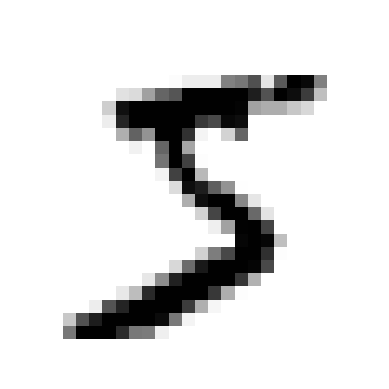

In [8]:
import matplotlib.pyplot as plt

some_digit = X[0]
some_digit_image = some_digit.reshape(28, 28)

plt.imshow(some_digit_image, cmap='binary')
plt.axis('off')

In [9]:
y[0]

'5'

In [10]:
y.info

<bound method Series.info of 0        5
1        0
2        4
3        1
4        9
        ..
69995    2
69996    3
69997    4
69998    5
69999    6
Name: class, Length: 70000, dtype: category
Categories (10, object): ['0', '1', '2', '3', ..., '6', '7', '8', '9']>

In [11]:
#Transforming our target in number
#uint8 is often used rather than int32 or float64 because it reduce memory usage

import numpy as np

y = y.astype(np.uint8)
y[0]

5

In [12]:
y.info

<bound method Series.info of 0        5
1        0
2        4
3        1
4        9
        ..
69995    2
69996    3
69997    4
69998    5
69999    6
Name: class, Length: 70000, dtype: uint8>

In [13]:
#The first 60.000 images in mnist are the train set and the others 10.000 are the test set

X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]

In [14]:
y_train_5 = (y_train == 5)
y_test_5 = (y_test == 5)

In [15]:
from sklearn.linear_model import SGDClassifier

sgd_clf = SGDClassifier(random_state = 42)

sgd_clf.fit(X_train, y_train_5)

SGDClassifier(random_state=42)

In [16]:
sgd_clf.predict([some_digit])

array([ True])

In [17]:
from sklearn.model_selection import cross_val_predict

y_train_pred = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3)

In [18]:
from sklearn.metrics import confusion_matrix

con_matrix = confusion_matrix(y_train_5, y_train_pred)
con_matrix

array([[53892,   687],
       [ 1891,  3530]], dtype=int64)

In [19]:
from sklearn.metrics import precision_score

precision_score(y_train_5, y_train_pred)

0.8370879772350012

In [20]:
from sklearn.metrics import recall_score

recall_score(y_train_5, y_train_pred)

0.6511713705958311

In [21]:
from sklearn.metrics import f1_score

f1_score(y_train_5, y_train_pred)

0.7325171197343847

In [22]:
y_scores = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3, method='decision_function')

In [23]:
from sklearn.metrics import precision_recall_curve

precision, recall, threshold = precision_recall_curve(y_train_5, y_scores)

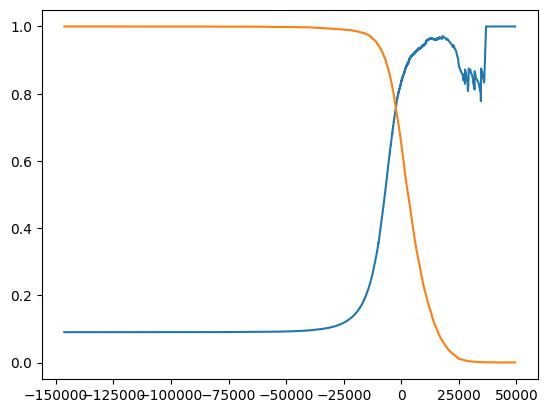

In [24]:
def plot_precision_recall_curve(precision, recall, threshold):
    plt.plot(threshold, precision[:-1])
    plt.plot(threshold, recall[:-1])

plot_precision_recall_curve(precision, recall, threshold)

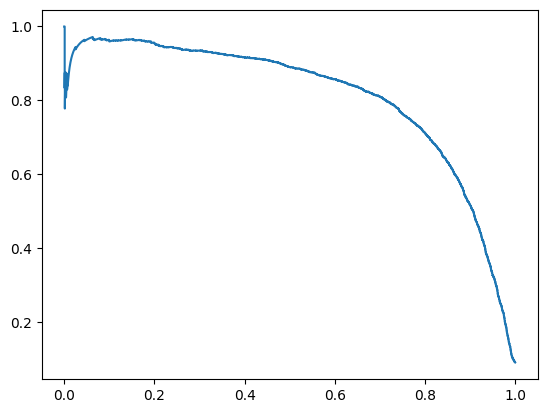

In [25]:
plt.plot(recall, precision)

In [26]:
from sklearn.ensemble import RandomForestClassifier

rf_clf = RandomForestClassifier()
rf_clf.fit(X_train, y_train_5)

RandomForestClassifier()

In [27]:
y_train_pred_rf = cross_val_predict(rf_clf, X_train, y_train_5, cv=3)

In [28]:
con_matrix_rf = confusion_matrix(y_train_5, y_train_pred_rf)
con_matrix_rf

array([[54528,    51],
       [  702,  4719]], dtype=int64)

In [29]:
precision_score(y_train_5, y_train_pred_rf)

0.9893081761006289

In [30]:
recall_score(y_train_5, y_train_pred_rf)

0.8705035971223022

In [31]:
f1_score(y_train_5, y_train_pred_rf)

0.9261112746541066

In [32]:
y_probas_rf = cross_val_predict(rf_clf, X_train, y_train_5, cv=3, method='predict_proba')

y_scores_rf = y_probas_rf[:,1]

In [33]:
precision_rf, recall_rf, threshold_rf = precision_recall_curve(y_train_5, y_scores_rf)

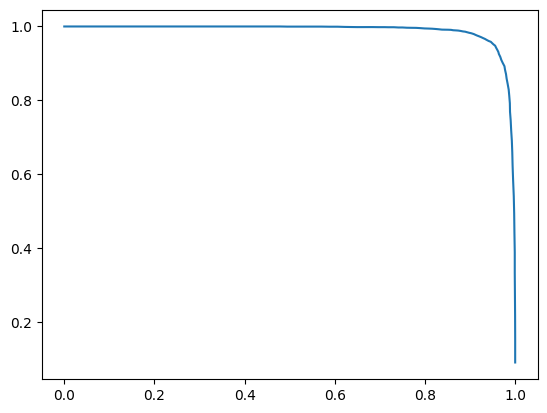

In [34]:
plt.plot(recall_rf, precision_rf)

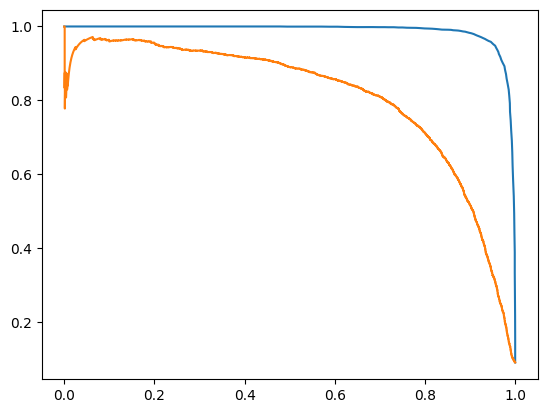

In [35]:
plt.plot(recall_rf, precision_rf)
plt.plot(recall, precision)

In [37]:
import joblib

joblib.dump(rf_clf, "5_predict.pkl")

['5_predict.pkl']